In [2]:
import numpy as np
import cv2
import glob
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (738, 1280, 3) uint8


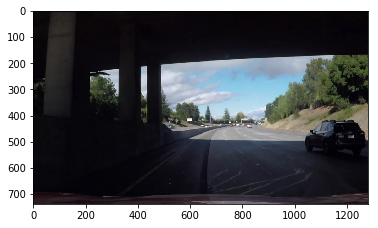

In [17]:
#reading in an image
image = (mpimg.imread('error_images/error3.png')*255).astype(np.uint8)

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape, image.dtype)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray')

In [18]:
def equalizeIntensity(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb);
        
        channels = cv2.split(ycrcb)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        channels[0] = clahe.apply(channels[0])
        
        ycrcb = cv2.merge(channels);

        result = cv2.cvtColor(ycrcb,cv2.COLOR_YCrCb2BGR);

        return result;
    return img

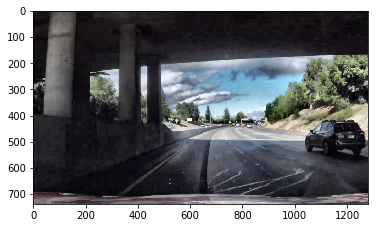

In [19]:
image_b = equalizeIntensity(image)

plt.imshow(image_b)

In [20]:
def lab_equal(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
        
        channels = cv2.split(ycrcb)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        channels[0] = clahe.apply(channels[0])

        ycrcb = cv2.merge(channels);
        result = cv2.cvtColor(ycrcb,cv2.COLOR_LAB2BGR);

        return result;
    return img

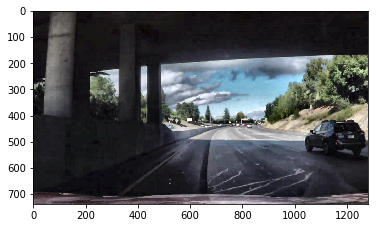

In [36]:
image_c = lab_equal(image)

plt.imshow(image_c)

In [22]:
def lab_b_channel2(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
        
        
        channels = cv2.split(ycrcb)
        result =  channels[2]
    return result

In [23]:
def lab_b_channel(img):
    if(img.shape[2] >= 3):
        ycrcb = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
        
        channels = cv2.split(ycrcb)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        channels[2] = clahe.apply(channels[2])
        
        result =  np.zeros_like(channels[2])
        #print(channels[2])
        result[channels[2] < 110] = 1
    return result

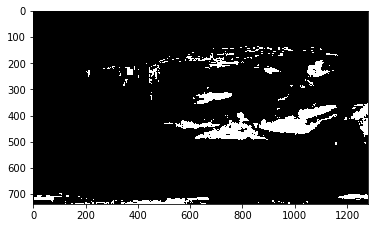

In [37]:
image_ca = lab_b_channel(image_c)

plt.imshow(image_ca, cmap='gray')

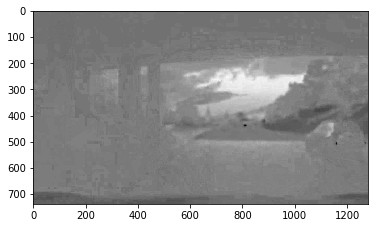

In [39]:
image_cb = lab_b_channel2(image_c)

plt.imshow(image_cb, cmap='gray')

In [26]:
def hls_s_channel(img):
    if(img.shape[2] >= 3):
        hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        
        channels = cv2.split(hls)
        clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        #channels[2] = clahe.apply(channels[2])
        
        result =  np.zeros_like(channels[2])
        #print(channels[2])
        result[(channels[2] > 170) & (channels[2] <= 255)] = 1
    return result

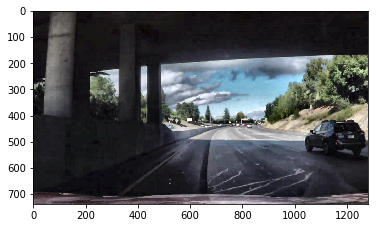

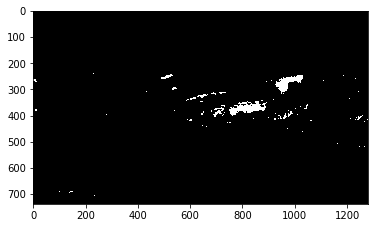

In [41]:
image_d = hls_s_channel(image_c)
plt.figure()
plt.imshow(image_c)
plt.figure()
plt.imshow(image_d, cmap='gray')

In [28]:
def removeNonYellowAndWhite(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_yellow = np.array([75,60,60])
    upper_yellow = np.array([115,255,255])
    lower_white = np.array([0,0,215], dtype=np.uint8)
    upper_white = np.array([180,40,255], dtype=np.uint8)
    
    kernel = np.ones((20,20), np.uint8)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    mask = cv2.bitwise_or(mask_yellow, mask_white)
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    res = cv2.bitwise_and(img, img, mask= mask)
    
    return res

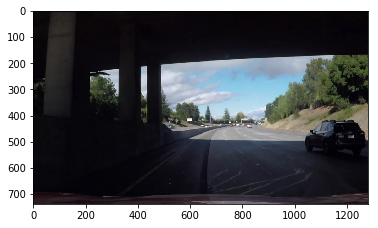

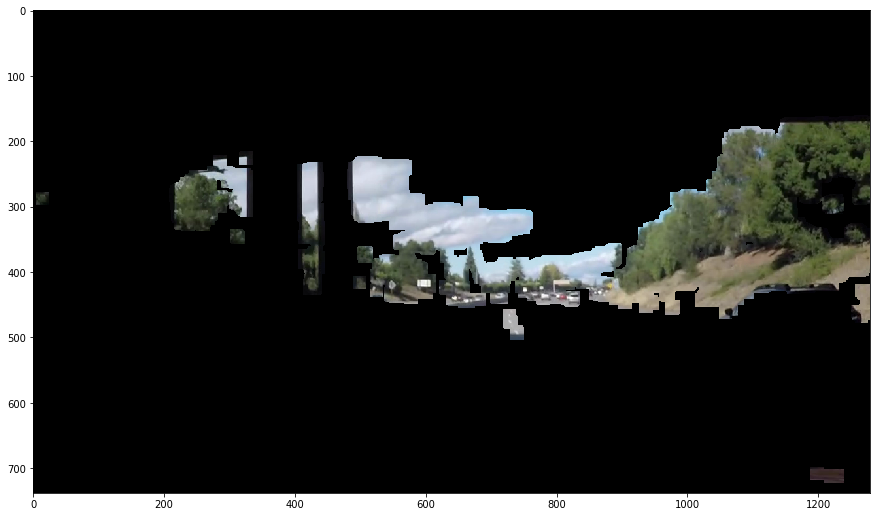

In [29]:
image_e = removeNonYellowAndWhite(image)
plt.figure()
plt.imshow(image)
plt.figure(figsize=(15,15))
plt.imshow(image_e)

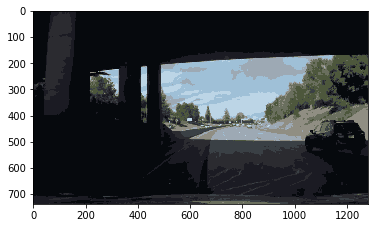

In [31]:
import numpy as np
import cv2
 
img = cv2.imread('error_images/error3.png')
#img = mpimg.imread('error_images/error.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2LAB);
Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

res2 = cv2.cvtColor(res2,cv2.COLOR_LAB2RGB);

plt.imshow(res2)

uint8


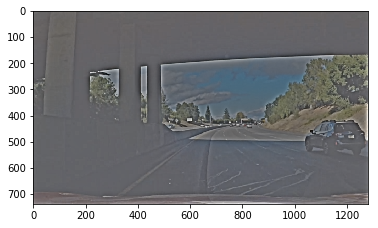

In [33]:
inputImage = mpimg.imread('error_images/error3.png')
retina = cv2.bioinspired.createRetina((inputImage.shape[1], inputImage.shape[0]))

for i in range(10): 
    retina.run(inputImage)
    
retinaOut_parvo = retina.getParvo()
retina.setup('error_images/MyRetinaParameters.xml')

#retinaOut_parvo = retinaOut_parvo * 255
#retinaOut_parvo = retinaOut_parvo.astype(np.uint8)

plt.imshow(inputImage)
plt.imshow(retinaOut_parvo)

print(retinaOut_parvo.dtype)

plt.imsave('error_images/error_test.jpg', retinaOut_parvo)

In [129]:
import timeit

kernel_15 = cv2.getGaussianKernel(6*15+1, 15)
kernel_80 = cv2.getGaussianKernel(6*80+1, 80)
kernel_250 = cv2.getGaussianKernel(6*250+1, 250)


def approx_g(image, sigma_g, n=5):
    w = np.sqrt(12*sigma_g**2/n + 1)
    wu = np.ceil(w) if np.ceil(w) % 2 == 1 else np.ceil(w)+1
    wl = np.floor(w) if np.floor(w) % 2 == 1 else np.floor(w)-1
    if w == w//1:
        wl -= 2
        wu += 2
    m = round((12*sigma_g**2 - n*wl**2 - 4*n*wl - 3*n) / (-4*wl - 4))
    wl = int(wl)
    wu = int(wu)
    for num in range(0,int(m)):
        image = cv2.blur(image, (wl, wl))
    for num in range(0,int(n-m)):
        image = cv2.blur(image, (wu, wu))
    return image

def GaussianBlur(img, sigma):
    output = np.copy(img)
    if(sigma == 15):
        kernel = kernel_15
    elif (sigma == 80):
        kernel = kernel_80
    elif (sigma == 250):
        kernel = kernel_250
        
    kernel = cv2.flip(kernel, -1)
    
    for i in range(3):
        output[:,:,i] = cv2.sepFilter2D(output[:,:,i], -1, kernel, kernel);
    return output

def singleScaleRetinex(img, sigma):
    start = timeit.default_timer()
    
    #retinex = np.log10(img) - np.log10(GaussianBlur(img, sigma))
    retinex = np.log10(img) - np.log10(approx_g(img, sigma))
    stop = timeit.default_timer()
    print('singleScaleRetinex', stop - start, img.shape )
    
    return retinex

def singleScaleRetinexB(img, sigma):
    start = timeit.default_timer()
    
    retinex = np.log10(img) - np.log10(cv2.GaussianBlur(img, (0, 0), sigma))
    stop = timeit.default_timer()
    print('singleScaleRetinex', stop - start, img.shape )
    
    return retinex

def multiScaleRetinex(img, sigma_list):

    retinex = np.zeros_like(img)
    for sigma in sigma_list:
        retinex += singleScaleRetinex(img, sigma)

    retinex = retinex / len(sigma_list)

    return retinex

def automatedMSRCR(img, sigma_list):

    img = np.float64(img) + 1.0

    start = timeit.default_timer()
    
    img_retinex = multiScaleRetinex(img, sigma_list)
    
    stop = timeit.default_timer()
    print(stop - start )

    start = timeit.default_timer()
    
    for i in range(img_retinex.shape[2]):
        unique, count = np.unique(np.int32(img_retinex[:, :, i] * 100), return_counts=True)
        for u, c in zip(unique, count):
            if u == 0:
                zero_count = c
                break
            
        low_val = unique[0] / 100.0
        high_val = unique[-1] / 100.0
        for u, c in zip(unique, count):
            if u < 0 and c < zero_count * 0.1:
                low_val = u / 100.0
            if u > 0 and c < zero_count * 0.1:
                high_val = u / 100.0
                break
            
        img_retinex[:, :, i] = np.maximum(np.minimum(img_retinex[:, :, i], high_val), low_val)
        
        img_retinex[:, :, i] = (img_retinex[:, :, i] - np.min(img_retinex[:, :, i])) / \
                               (np.max(img_retinex[:, :, i]) - np.min(img_retinex[:, :, i])) \
                               * 255
    
    stop = timeit.default_timer()
    print(stop - start )
    
    img_retinex = np.uint8(img_retinex)
        
    return img_retinex

singleScaleRetinex 0.1357529317438093 (720, 1280, 3)
singleScaleRetinex 0.14660453985834465 (720, 1280, 3)
singleScaleRetinex 0.1770216864597387 (720, 1280, 3)
0.49436706865435553
0.15491321444187633


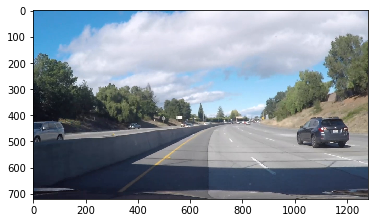

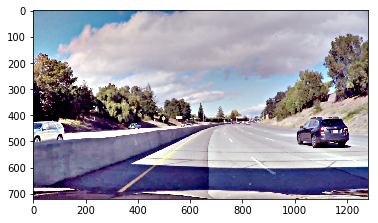

In [130]:
import json

f = \
'''
{
    "sigma_list": [15, 80, 250],
    "G"         : 5.0,
    "b"         : 25.0,
    "alpha"     : 125.0,
    "beta"      : 46.0,
    "low_clip"  : 0.01,
    "high_clip" : 0.99
}
'''

config = json.loads(f)

inputImage = cv2.imread('error_images/error.jpg')

img_amsrcr = automatedMSRCR(
        inputImage,
        [15, 80, 250]
    )
plt.figure()
plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB) )
plt.figure()
img_amsrcr = cv2.cvtColor(img_amsrcr, cv2.COLOR_BGR2RGB)
plt.imshow( img_amsrcr)

plt.imsave('error_images/error_test.jpg', img_amsrcr)

singleScaleRetinex 0.14794815208369982 (738, 1280, 3)
singleScaleRetinex 0.15870511776665808 (738, 1280, 3)
singleScaleRetinex 0.19135985969296598 (738, 1280, 3)
0.5342534232640901
0.18255687234523066
Wall time: 742 ms


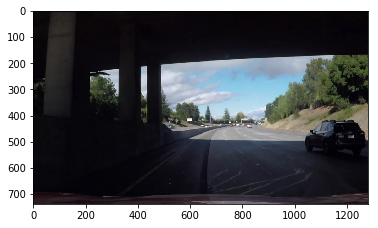

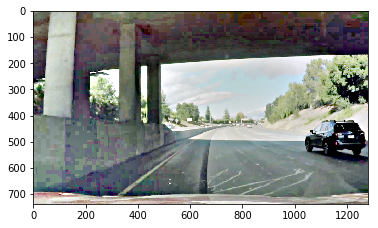

In [224]:
import json

f = \
'''
{
    "sigma_list": [15, 80, 250],
    "G"         : 5.0,
    "b"         : 25.0,
    "alpha"     : 125.0,
    "beta"      : 46.0,
    "low_clip"  : 0.01,
    "high_clip" : 0.99
}
'''

config = json.loads(f)

inputImage = cv2.imread('error_images/error3.png')

%time img_amsrcr = automatedMSRCR(inputImage,[15, 80, 250])
plt.figure()
plt.imshow(cv2.cvtColor(inputImage, cv2.COLOR_BGR2RGB) )
plt.figure()
img_amsrcr = cv2.cvtColor(img_amsrcr, cv2.COLOR_BGR2RGB)
plt.imshow( img_amsrcr)

#plt.imsave('test_images/error_test.jpg', img_amsrcr)

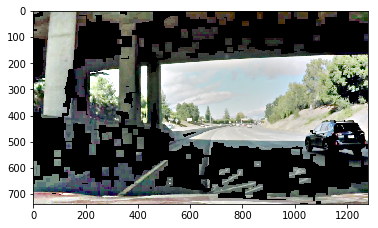

In [228]:
def removeNonYellowAndWhite(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([20,60,60])
    upper_yellow = np.array([100,255,255])
    lower_white = np.array([0,0,195], dtype=np.uint8)
    upper_white = np.array([180,60,255], dtype=np.uint8)
    
    kernel = np.ones((20,20), np.uint8)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    mask = cv2.bitwise_or(mask_yellow, mask_white)
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    res = cv2.bitwise_and(img, img, mask= mask)
    
    return res

img_f = removeNonYellowAndWhite(img_amsrcr)
plt.imshow( img_f)

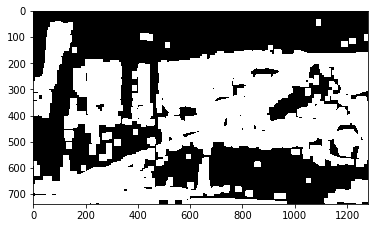

In [229]:
def yellow_and_white_mask(img):
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lower_yellow = np.array([75,60,60])
    upper_yellow = np.array([115,255,255])
    lower_white = np.array([0,0,215], dtype=np.uint8)
    upper_white = np.array([180,40,255], dtype=np.uint8)
    
    kernel = np.ones((20,20), np.uint8)

    # Threshold the HSV image to get only yellow colors
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_white = cv2.inRange(hsv, lower_white, upper_white)
    
    mask = cv2.bitwise_or(mask_yellow, mask_white)
    mask = cv2.dilate(mask, kernel, iterations=1)
    
    return mask

img_m = yellow_and_white_mask(img_amsrcr)
plt.imshow( img_m, cmap='gray')

In [230]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    # 3) Take the absolute value of the derivative or gradient
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    # 6) Return this mask as your binary_output image
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    
    return binary_output

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    # 2) Apply a threshold to the S channel
    # 3) Return a binary image of threshold result
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel > thresh[0]) & (s_channel <= thresh[1])] = 1

    return binary_output

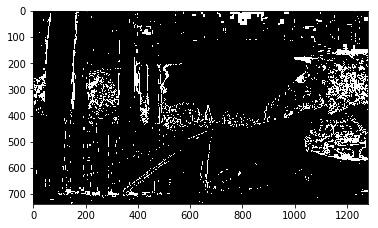

In [233]:
sxbinary = abs_sobel_thresh(img_amsrcr, 'x', 20, 100) #[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
s_binary = hls_select(img_amsrcr, (170, 255)) #[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

# Combine the two binary thresholds
combined_binary = np.zeros_like(s_binary)
#combined_binary[(img_m == 255) & ((s_binary == 1) | (sxbinary == 1))] = 1
combined_binary[ ((s_binary == 1) | (sxbinary == 1))] = 1

plt.imshow( combined_binary, cmap='gray')

In [204]:
img_m


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)